In [28]:
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import nibabel as nib
from tqdm.notebook import tqdm
from preprocessing import dataloaders, dataset_sizes, image_datasets, dataset
from torchvision import transforms, datasets, models
from torch.optim import lr_scheduler
from torchsummary import summary
from train import train_model, train_accuracy, train_loss, val_accuracy, val_loss
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [23]:
model = models.resnet50(pretrained=True).to(device) 
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False).to(device)
model.fc = nn.Linear(model.fc.in_features, 2).to(device)


criterion = nn.CrossEntropyLoss()

optimizer_ft = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [24]:
# One channel Resnet 50
model = train_model(model, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------------------------------------------------------------------------------------------------



train Loss: 0.6765 Acc: 0.6006



val Loss: 0.7382 Acc: 0.6186
Epoch 1/24
----------------------------------------------------------------------------------------------------



train Loss: 0.5794 Acc: 0.7013



val Loss: 0.6281 Acc: 0.6356
Epoch 2/24
----------------------------------------------------------------------------------------------------



train Loss: 0.5258 Acc: 0.7309



val Loss: 0.5524 Acc: 0.6780
Epoch 3/24
----------------------------------------------------------------------------------------------------



train Loss: 0.3886 Acc: 0.8273



val Loss: 0.5659 Acc: 0.6864
Epoch 4/24
----------------------------------------------------------------------------------------------------



train Loss: 0.2544 Acc: 0.8962



val Loss: 0.7417 Acc: 0.7203
Epoch 5/24
----------------------------------------------------------------------------------------------------



train Loss: 0.2142 Acc: 0.9100



val Loss: 0.8773 Acc: 0.6525
Epoch 6/24
----------------------------------------------------------------------------------------------------



train Loss: 0.2120 Acc: 0.9184



val Loss: 0.7276 Acc: 0.7458
Epoch 7/24
----------------------------------------------------------------------------------------------------



train Loss: 0.1305 Acc: 0.9481



val Loss: 0.5447 Acc: 0.7542
Epoch 8/24
----------------------------------------------------------------------------------------------------



train Loss: 0.0835 Acc: 0.9746



val Loss: 0.5539 Acc: 0.7542
Epoch 9/24
----------------------------------------------------------------------------------------------------



train Loss: 0.0732 Acc: 0.9778



val Loss: 0.5557 Acc: 0.7458
Epoch 10/24
----------------------------------------------------------------------------------------------------



train Loss: 0.0641 Acc: 0.9756



val Loss: 0.5625 Acc: 0.7881
Epoch 11/24
----------------------------------------------------------------------------------------------------



train Loss: 0.0692 Acc: 0.9767



val Loss: 0.5660 Acc: 0.7627
Epoch 12/24
----------------------------------------------------------------------------------------------------



train Loss: 0.0638 Acc: 0.9725



val Loss: 0.5795 Acc: 0.7542
Epoch 13/24
----------------------------------------------------------------------------------------------------



train Loss: 0.0630 Acc: 0.9788



val Loss: 0.6088 Acc: 0.7712
Epoch 14/24
----------------------------------------------------------------------------------------------------



train Loss: 0.0558 Acc: 0.9831



val Loss: 0.5995 Acc: 0.7627
Epoch 15/24
----------------------------------------------------------------------------------------------------



train Loss: 0.0536 Acc: 0.9841



val Loss: 0.5993 Acc: 0.7542
Epoch 16/24
----------------------------------------------------------------------------------------------------



train Loss: 0.0488 Acc: 0.9820



val Loss: 0.5900 Acc: 0.7881
Epoch 17/24
----------------------------------------------------------------------------------------------------



train Loss: 0.0533 Acc: 0.9841



val Loss: 0.5754 Acc: 0.7712
Epoch 18/24
----------------------------------------------------------------------------------------------------



train Loss: 0.0405 Acc: 0.9947



val Loss: 0.6064 Acc: 0.7627
Epoch 19/24
----------------------------------------------------------------------------------------------------



train Loss: 0.0479 Acc: 0.9841



val Loss: 0.5863 Acc: 0.7627
Epoch 20/24
----------------------------------------------------------------------------------------------------



train Loss: 0.0438 Acc: 0.9905



val Loss: 0.5989 Acc: 0.7797
Epoch 21/24
----------------------------------------------------------------------------------------------------



train Loss: 0.0438 Acc: 0.9852



val Loss: 0.5847 Acc: 0.7712
Epoch 22/24
----------------------------------------------------------------------------------------------------



train Loss: 0.0405 Acc: 0.9894



val Loss: 0.5867 Acc: 0.7712
Epoch 23/24
----------------------------------------------------------------------------------------------------



train Loss: 0.0524 Acc: 0.9862



val Loss: 0.5970 Acc: 0.7627
Epoch 24/24
----------------------------------------------------------------------------------------------------



train Loss: 0.0422 Acc: 0.9862



val Loss: 0.6021 Acc: 0.7542
Training complete in 18m 14s
Best val Acc: 0.788136


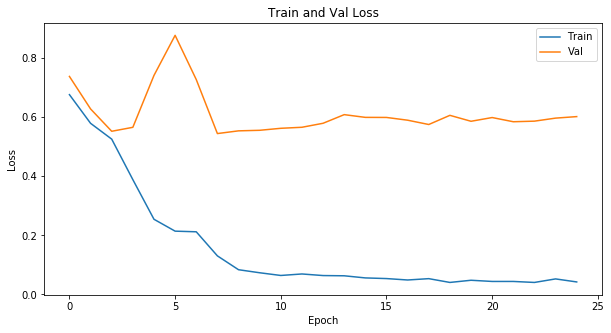

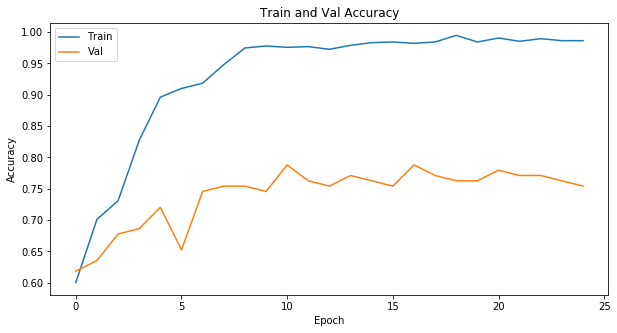

In [25]:
plt.figure(figsize=(10,5))
plt.title("Train and Val Loss")
plt.plot(train_loss,label="Train")
plt.plot(val_loss,label="Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.title("Train and Val Accuracy")
plt.plot(train_accuracy,label="Train")
plt.plot(val_accuracy,label="Val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
means = []
stds = []
for img in tqdm(dataset):
    means.append(torch.mean(img[0]))
    stds.append(torch.std(img[0]))

mean = torch.mean(torch.tensor(means))
std = torch.mean(torch.tensor(stds))
print(mean, std)


tensor(199.8274, dtype=torch.float64) tensor(220.4913, dtype=torch.float64)


In [ ]:
x = torch.tensor([5,4,3]).unsqueeze(1)
x.shape

In [ ]:
199.8274
220.4913